In [2]:
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
ruta_local = 'G:'

In [8]:
path_shp_recorridos = ruta_local + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\RECORRIDOS.shp'
path_shp_plan = ruta_local + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\PLANIFICACION.shp'
path_xlsx_parte = ruta_local + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\parte_diario_pulverizacion.xlsx'

In [281]:
# Cargar los archivos Shapefile
gdf_recorridos = gpd.read_file(path_shp_recorridos)
gdf_plan = gpd.read_file(path_shp_plan)

In [282]:
idd = 14

In [283]:
selec_recorridos = gdf_recorridos[gdf_recorridos['idd']==idd]

In [284]:
selec_plan = gdf_plan[gdf_plan['idd'] == idd]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_24140\2512288014.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


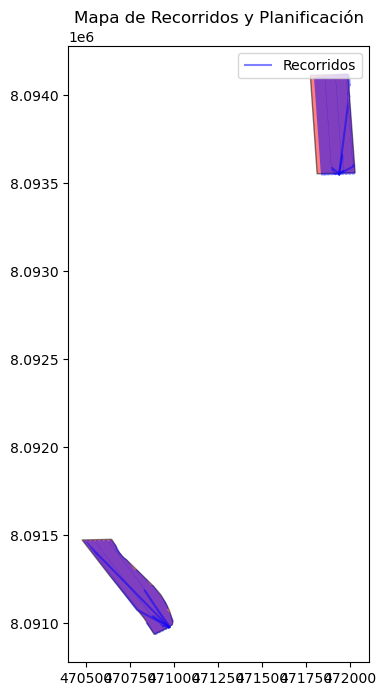

In [285]:
fig, ax = plt.subplots(figsize=(10, 8))
# Graficar las capas
selec_recorridos.plot(ax=ax, color="blue", alpha=0.5, edgecolor="black", label="Recorridos")
selec_plan.plot(ax=ax, color="red", alpha=0.5, edgecolor="black", label="Planificación")

# Configurar la visualización
ax.set_title("Mapa de Recorridos y Planificación")
ax.legend()

# Mostrar el gráfico
plt.show()

In [286]:
selec_recorridos["fecha"] = pd.to_datetime(selec_recorridos["fecha"])

C:\Users\Usuario\anaconda3\envs\utea\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [287]:
# Obtener la fecha mínima y máxima
fecha_min = selec_recorridos["fecha"].min()
fecha_max = selec_recorridos["fecha"].max()
fecha_intermedia = fecha_min + (fecha_max - fecha_min) / 2

In [288]:
# Convertir las fechas al formato dd/mm/aaaa
fecha_min_str = fecha_min.strftime("%d/%m/%Y")
fecha_max_str = fecha_max.strftime("%d/%m/%Y")
fecha_intermedia_str = fecha_intermedia.strftime("%d/%m/%Y")
# Obtener el número de semana de la fecha intermedia
numero_semana = fecha_intermedia.isocalendar().week

In [289]:
area_total_pulv = selec_recorridos['area'].sum()
area_total_pulv

19.60933343138

In [290]:
fecha_min

Timestamp('2025-03-16 00:00:00')

In [291]:
fecha_max

Timestamp('2025-03-16 00:00:00')

In [292]:
fecha_intermedia

Timestamp('2025-03-16 00:00:00')

In [293]:
numero_semana

11

In [294]:
num_vuelos = len(selec_recorridos)
num_vuelos

8

In [295]:
selec_recorridos

,file,fecha,hora,id,drone,ctrl_id,pilot,fl_time,mode,height,spacing,fl_speed,area,spray,idd,geometry
221,T50-1_20250316031036_R2984461855.kml,2025-03-16,03:10:36,R2984461855,T50-1,1581F6BUB24630011R08,Alejandro Sanchez Guzman,8:45,Auto,3.5,10.129,29.880001,3.408667,34.150,14,"LINESTRING (471938.252 8093548.391, 471938.252..."
222,T50-1_20250316032352_R3124619684.kml,2025-03-16,03:23:52,R3124619684,T50-1,1581F6BUB24630011R08,Alejandro Sanchez Guzman,8:55,Auto,3.0,10.129,29.880001,3.482667,34.905,14,"LINESTRING (471938.162 8093548.360, 471938.160..."
223,T50-1_20250316034836_R3184687325.kml,2025-03-16,03:48:36,R3184687325,T50-1,1581F6BUB24630011R08,Alejandro Sanchez Guzman,8:45,Auto,3.0,10.129,29.880001,3.381333,33.900,14,"LINESTRING (471938.183 8093547.660, 471938.183..."
224,T50-1_20250316041229_R3264777513.kml,2025-03-16,04:12:29,R3264777513,T50-1,1581F6BUB24630011R08,Alejandro Sanchez Guzman,4:11,Auto,3.0,10.129,29.880001,0.583333,5.820,14,"LINESTRING (471938.115 8093546.712, 471938.115..."
225,T50-1_20250316053218_R3324845154.kml,2025-03-16,05:32:18,R3324845154,T50-1,1581F6BUB24630011R08,Alejandro Sanchez Guzman,7:40,Auto,2.5,10.129,29.880001,2.806000,28.190,14,"LINESTRING (470975.971 8090970.484, 470971.415..."
226,T50-1_20250316054449_R3424957889.kml,2025-03-16,05:44:49,R3424957889,T50-1,1581F6BUB24630011R08,Alejandro Sanchez Guzman,8:41,Auto,3.5,10.129,32.039999,3.440000,35.622,14,"LINESTRING (470975.562 8090971.430, 470970.327..."
227,T50-1_20250316055716_R3525070624.kml,2025-03-16,05:57:16,R3525070624,T50-1,1581F6BUB24630011R08,Alejandro Sanchez Guzman,10:02,Auto,3.2,10.129,32.039999,2.009333,20.103,14,"LINESTRING (470975.258 8090971.778, 470832.569..."
228,T50-1_20250316060917_R3605160812.kml,2025-03-16,06:09:17,R3605160812,T50-1,1581F6BUB24630011R08,Alejandro Sanchez Guzman,4:01,Auto,3.2,10.129,32.039999,0.498000,5.009,14,"LINESTRING (470974.982 8090972.221, 470970.201..."


In [296]:
# Convert "fl_time" to total seconds
selec_recorridos["fl_time_sec"] = selec_recorridos["fl_time"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
# Sum all seconds
total_seconds = selec_recorridos["fl_time_sec"].sum()
# Convert back to hh:mm:ss format
hours = total_seconds // 3600
minutes = (total_seconds % 3600) // 60
seconds = total_seconds % 60
total_flight_time = f"{hours:02}:{minutes:02}:{seconds:02}"
total_flight_time

C:\Users\Usuario\anaconda3\envs\utea\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


'01:01:00'

In [297]:
total_caudal = selec_recorridos['spray'].sum()
total_caudal

197.699

In [298]:
df_parte = pd.read_excel(path_xlsx_parte)

In [299]:
df_parte['FECHA'] = pd.to_datetime(df_parte['FECHA'], errors='coerce')
df_parte['HORA DE INICIO'] = pd.to_datetime(df_parte['HORA DE INICIO'], errors='coerce')
df_parte['HORA FINAL'] = pd.to_datetime(df_parte['HORA FINAL'], errors='coerce')

In [300]:
df_parte

,Nº DE LABOR,FECHA,SEMANA,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,...,OS,TEMP MAX,TEMP MIN,TIPO CULTIVO,TIPO DESARROLLO,NUM VUELOS,HORAS VUELO,TOTAL CAUDAL,idd,AREA PULVERIZADO
0,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L31,30.260942,...,1,25.0,20.0,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1.0,28.633271
1,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L16,23.216246,...,1,25.0,20.0,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1.0,21.664272
2,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L6,19.683505,...,1,25.0,20.0,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1.0,19.160233
3,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L35,7.795719,...,1,25.0,20.0,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1.0,7.369442
4,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L34,7.048921,...,1,25.0,20.0,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1.0,6.632540
5,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L5,10.318332,...,1,25.0,20.0,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1.0,9.850859
6,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L9,26.783587,...,1,25.0,20.0,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1.0,21.533076
7,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L15,17.950658,...,1,25.0,20.0,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1.0,16.469801
8,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L7,15.371285,...,1,25.0,20.0,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1.0,14.745376
9,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L10,26.586339,...,1,25.0,20.0,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1.0,20.709980


In [301]:
# extraer primer dato de temp max
temp_max = df_parte[df_parte['idd'] == idd]['TEMP MAX'].iloc[0]
temp_min = df_parte[df_parte['idd'] == idd]['TEMP MIN'].iloc[0]

In [302]:
temp = round((temp_max + temp_min) / 2)
temp

30

In [303]:
# Aplicar el buffer a la geometría
selec_recorridos["geometry"] = selec_recorridos.geometry.buffer(5.5)

C:\Users\Usuario\anaconda3\envs\utea\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [304]:
# Disolver todas las geometrías en un solo polígono
buffer_dissolved = selec_recorridos.dissolve()

In [305]:
buffer_dissolved

,geometry,file,fecha,hora,id,drone,ctrl_id,pilot,fl_time,mode,height,spacing,fl_speed,area,spray,idd,fl_time_sec
0,"MULTIPOLYGON (((470980.845 8090973.225, 470981...",T50-1_20250316031036_R2984461855.kml,2025-03-16,03:10:36,R2984461855,T50-1,1581F6BUB24630011R08,Alejandro Sanchez Guzman,8:45,Auto,3.5,10.129,29.880001,3.408667,34.15,14,525


In [306]:
# Calcular la intersección
interseccion = gpd.overlay(buffer_dissolved, selec_plan, how="intersection")

In [307]:
# Calcular el área de cada polígono de la intersección
interseccion["area_rociado"] = interseccion.geometry.area / 10000

In [308]:
resumen = interseccion[['id_2', 'unidad_05', 'area_2', 'area_rociado']].copy()

In [309]:
# Calcular el total de area_2
total_area_2 = resumen["area_2"].sum()
total_area_rociado = resumen["area_rociado"].sum()
# Crear una nueva columna con el porcentaje
resumen["porcen_rociado"] = (resumen["area_rociado"] / total_area_2)

In [310]:
diferencia = total_area_rociado - area_total_pulv
diferencia

-0.07160309033447376

In [311]:
resumen["area_diff"] = resumen["porcen_rociado"] * diferencia

In [312]:
resumen["area_rociado_ajustado"] = resumen["area_rociado"] - resumen["area_diff"]

In [313]:
resumen = resumen[['id_2', 'unidad_05', 'area_2', 'area_rociado_ajustado']].copy()

In [314]:
total_area_rociado_ajustado = resumen["area_rociado_ajustado"].sum()
resumen["porcen_rociado"] = (resumen["area_rociado_ajustado"]) / (resumen["area_2"])

In [315]:
resumen["dif_area"] = resumen["area_2"] - resumen["area_rociado_ajustado"]

In [316]:
resumen

,id_2,unidad_05,area_2,area_rociado_ajustado,porcen_rociado,dif_area
0,22,L21.2,12.006953,10.802369,0.899676,1.204583
1,25,L7,8.968524,8.802056,0.981439,0.166468


In [317]:
for i, row in resumen.iterrows():
    df_parte.loc[(df_parte['ID'] == row['id_2']), 'AREA PULVERIZADO'] = row['area_rociado_ajustado']

In [318]:
df_parte.loc[(df_parte['idd'] == idd), 'FECHA'] = fecha_intermedia
df_parte.loc[(df_parte['idd'] == idd), 'SEMANA'] = numero_semana
df_parte.loc[(df_parte['idd'] == idd), 'HORA DE INICIO'] = fecha_min
df_parte.loc[(df_parte['idd'] == idd), 'HORA FINAL'] = fecha_max
df_parte.loc[(df_parte['idd'] == idd), 'TEMPERATURA'] = temp
df_parte.loc[(df_parte['idd'] == idd), 'NUM VUELOS'] = num_vuelos
df_parte.loc[(df_parte['idd'] == idd), 'HORAS VUELO'] = total_flight_time
df_parte.loc[(df_parte['idd'] == idd), 'TOTAL CAUDAL'] = total_caudal

In [319]:
output_path = path_xlsx_parte
df_parte.to_excel(output_path, index=False)